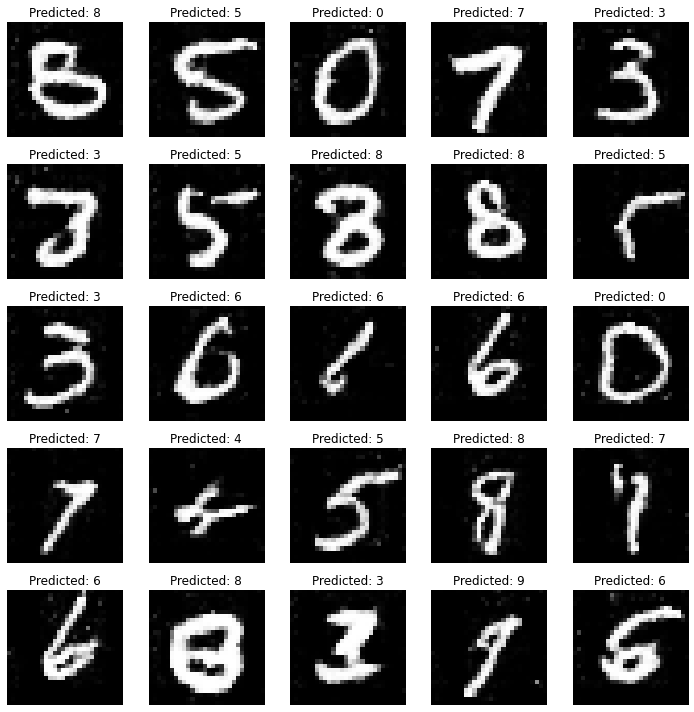

Digit 8 in /home/ws38/case/generated/gan100: 1040 occurrences
Digit 5 in /home/ws38/case/generated/gan100: 1103 occurrences
Digit 0 in /home/ws38/case/generated/gan100: 1037 occurrences
Digit 7 in /home/ws38/case/generated/gan100: 1094 occurrences
Digit 3 in /home/ws38/case/generated/gan100: 910 occurrences
Digit 6 in /home/ws38/case/generated/gan100: 1120 occurrences
Digit 4 in /home/ws38/case/generated/gan100: 872 occurrences
Digit 9 in /home/ws38/case/generated/gan100: 1094 occurrences
Digit 1 in /home/ws38/case/generated/gan100: 990 occurrences
Digit 2 in /home/ws38/case/generated/gan100: 740 occurrences


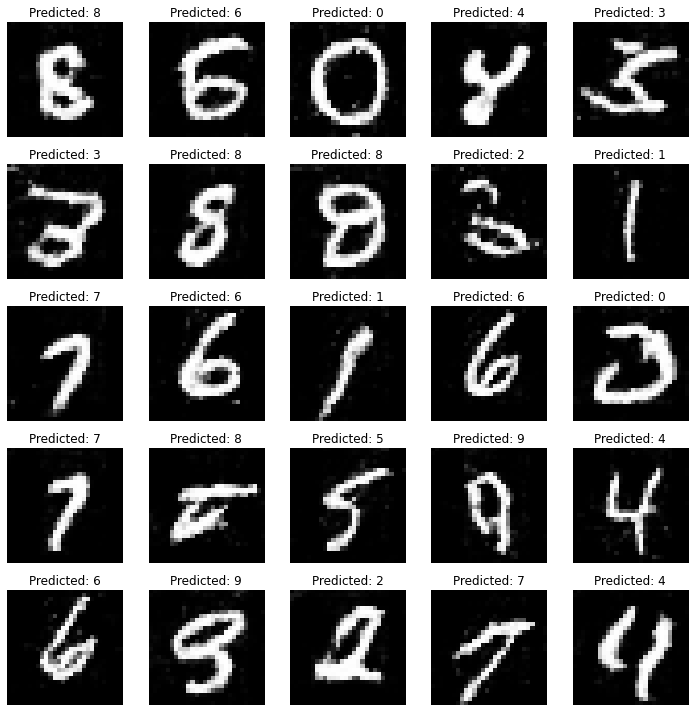

Digit 8 in /home/ws38/case/generated/gan60: 1173 occurrences
Digit 6 in /home/ws38/case/generated/gan60: 1053 occurrences
Digit 0 in /home/ws38/case/generated/gan60: 737 occurrences
Digit 4 in /home/ws38/case/generated/gan60: 1141 occurrences
Digit 3 in /home/ws38/case/generated/gan60: 969 occurrences
Digit 2 in /home/ws38/case/generated/gan60: 821 occurrences
Digit 1 in /home/ws38/case/generated/gan60: 1069 occurrences
Digit 7 in /home/ws38/case/generated/gan60: 1146 occurrences
Digit 5 in /home/ws38/case/generated/gan60: 896 occurrences
Digit 9 in /home/ws38/case/generated/gan60: 995 occurrences


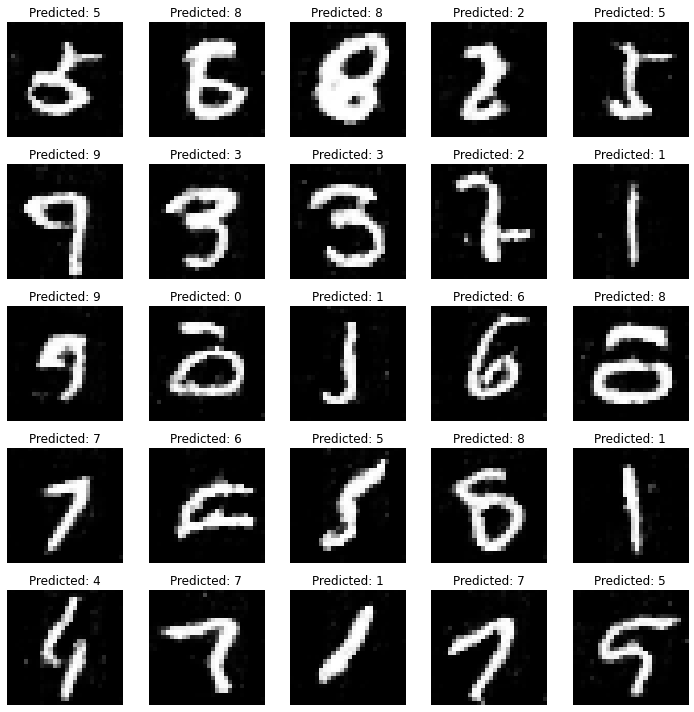

Digit 5 in /home/ws38/case/generated/gan30: 934 occurrences
Digit 8 in /home/ws38/case/generated/gan30: 1190 occurrences
Digit 2 in /home/ws38/case/generated/gan30: 845 occurrences
Digit 9 in /home/ws38/case/generated/gan30: 1254 occurrences
Digit 3 in /home/ws38/case/generated/gan30: 1034 occurrences
Digit 1 in /home/ws38/case/generated/gan30: 1169 occurrences
Digit 0 in /home/ws38/case/generated/gan30: 332 occurrences
Digit 6 in /home/ws38/case/generated/gan30: 1093 occurrences
Digit 7 in /home/ws38/case/generated/gan30: 1293 occurrences
Digit 4 in /home/ws38/case/generated/gan30: 856 occurrences


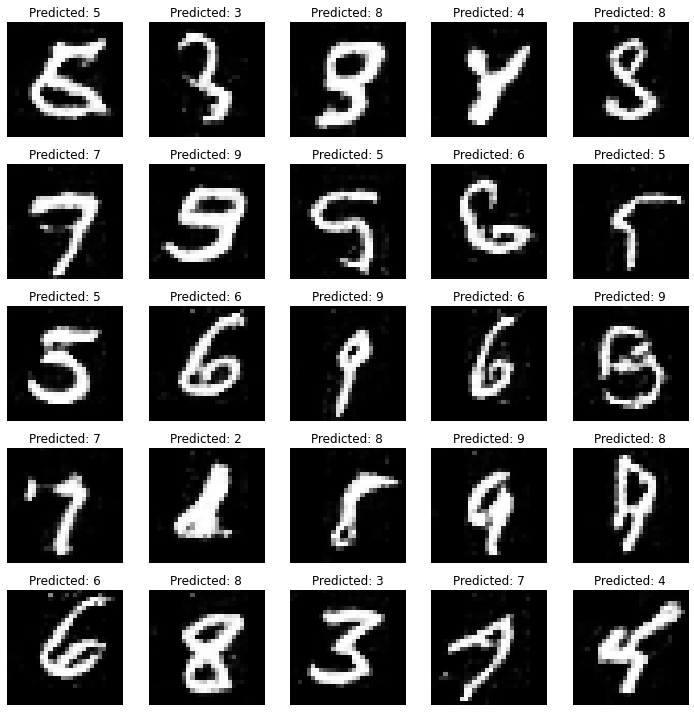

Digit 5 in /home/ws38/case/generated/gan10: 1143 occurrences
Digit 3 in /home/ws38/case/generated/gan10: 1065 occurrences
Digit 8 in /home/ws38/case/generated/gan10: 1232 occurrences
Digit 4 in /home/ws38/case/generated/gan10: 917 occurrences
Digit 7 in /home/ws38/case/generated/gan10: 1284 occurrences
Digit 9 in /home/ws38/case/generated/gan10: 1316 occurrences
Digit 6 in /home/ws38/case/generated/gan10: 1002 occurrences
Digit 2 in /home/ws38/case/generated/gan10: 844 occurrences
Digit 1 in /home/ws38/case/generated/gan10: 978 occurrences
Digit 0 in /home/ws38/case/generated/gan10: 219 occurrences


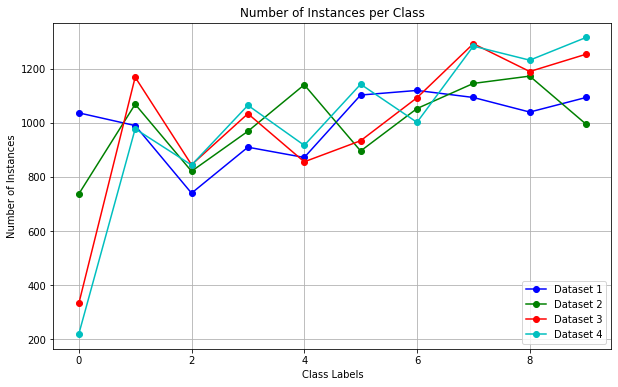

In [1]:
import os
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter

# Define your neural network model
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

MNISTClassifier = Net()
# Load the pretrained weights
pretrained_path = "/home/ws38/case/mnist_classifier.pth"
MNISTClassifier.load_state_dict(torch.load(pretrained_path))
MNISTClassifier.eval()

# Define your GAN generated images dataset class
class GANGeneratedDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(root_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images[idx])
        image = Image.open(img_name).convert('L')  # Convert to grayscale
        if self.transform:
            image = self.transform(image)
        return image

# Define a function to display images along with their predicted class
def display_images_with_predictions(images, predicted_classes):
    num_images = len(images)
    fig, axes = plt.subplots(5, 5, figsize=(10, 10))

    for i in range(5):
        for j in range(5):
            idx = i * 5 + j
            if idx < num_images:
                image = images[idx].squeeze().numpy()  # Squeeze the image tensor to remove the channel dimension
                axes[i, j].imshow(image, cmap='gray')
                axes[i, j].set_title(f"Predicted: {predicted_classes[idx]}")
                axes[i, j].axis('off')

    plt.tight_layout()
    plt.show()

# Define a function to plot the class counts with multiple lines for different datasets
def plot_class_counts(digit_counts_per_dataset, dataset_names):
    plt.figure(figsize=(10, 6))

    colors = ['b', 'g', 'r', 'c']  # Colors for the datasets
    for i, digit_counts in enumerate(digit_counts_per_dataset):
        classes = sorted(digit_counts.keys())
        counts = [digit_counts[cls] for cls in classes]
        plt.plot(classes, counts, marker='o', linestyle='-', color=colors[i], label=dataset_names[i])

    plt.xlabel('Class Labels')
    plt.ylabel('Number of Instances')
    plt.title('Number of Instances per Class')
    plt.legend()
    plt.grid(True)
    plt.show()

# Load the GAN generated images dataset
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
])

folders = [
    "/home/ws38/case/generated/gan100",
    "/home/ws38/case/generated/gan60",
    "/home/ws38/case/generated/gan30",
    "/home/ws38/case/generated/gan10"
]
dataset_names = ['Dataset 1', 'Dataset 2', 'Dataset 3', 'Dataset 4']

digit_counts_per_dataset = []

# Iterate through each folder, classify images, and collect the results
for folder in folders:
    gan_dataset = GANGeneratedDataset(root_dir=folder, transform=transform)
    data_loader = DataLoader(dataset=gan_dataset, batch_size=25, shuffle=False)
    
    classified_results = []
    images_to_display = []

    for batch_idx, images in enumerate(data_loader):
        outputs = MNISTClassifier(images)
        _, predicted = torch.max(outputs, 1)
        classified_results.extend(predicted.tolist())
        images_to_display.extend(images)

    # Display the images in a 5x5 grid along with their predicted class
    display_images_with_predictions(images_to_display, classified_results)

    # Count the occurrences of each digit
    digit_counts = Counter(classified_results)
    digit_counts_per_dataset.append(digit_counts)
    
    # Print the counts
    for digit, count in digit_counts.items():
        print(f"Digit {digit} in {folder}: {count} occurrences")

# Plot the total counts of all classified images for each dataset
plot_class_counts(digit_counts_per_dataset, dataset_names)
